# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
print(f"Number of rows: {df_data.shape[0]}")
print(f"Number of columns: {df_data.shape[1]}")

Number of rows: 4324
Number of columns: 9


In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.info()
print(f"Number of nan: {df_data.isna().values.sum()}")
print(f"Number of duplicates: {df_data.duplicated().values.any()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB
Number of nan: 3360
Number of duplicates: False


In [ ]:
df_data[df_data.isna()["Price"]]


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_clean = df_data.dropna(subset=['Price'])
df_clean.shape

(964, 9)

In [ ]:
df_clean.isna().values.any()
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


## Descriptive Statistics

In [ ]:
df_clean.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
df_data.groupby("Organisation")["Unnamed: 0.1"].count()

,Unnamed: 0.1
Organisation,
AEB,3
AMBA,8
ASI,9
Arianespace,279
Arm??e de l'Air,4
Blue Origin,12
Boeing,136
CASC,251
CASIC,5


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
df_data.groupby(["Rocket_Status"], as_index=False).count()

,Rocket_Status,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Price,Mission_Status
0,StatusActive,790,790,790,790,790,790,586,790
1,StatusRetired,3534,3534,3534,3534,3534,3534,378,3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
status = df_data.groupby(["Mission_Status"]).count()
for n in range(len(status.index)):
  print(f"Number of {status.index[n]} is {status.values[n][0]}")

Number of Failure is 339
Number of Partial Failure is 102
Number of Prelaunch Failure is 4
Number of Success is 3879


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

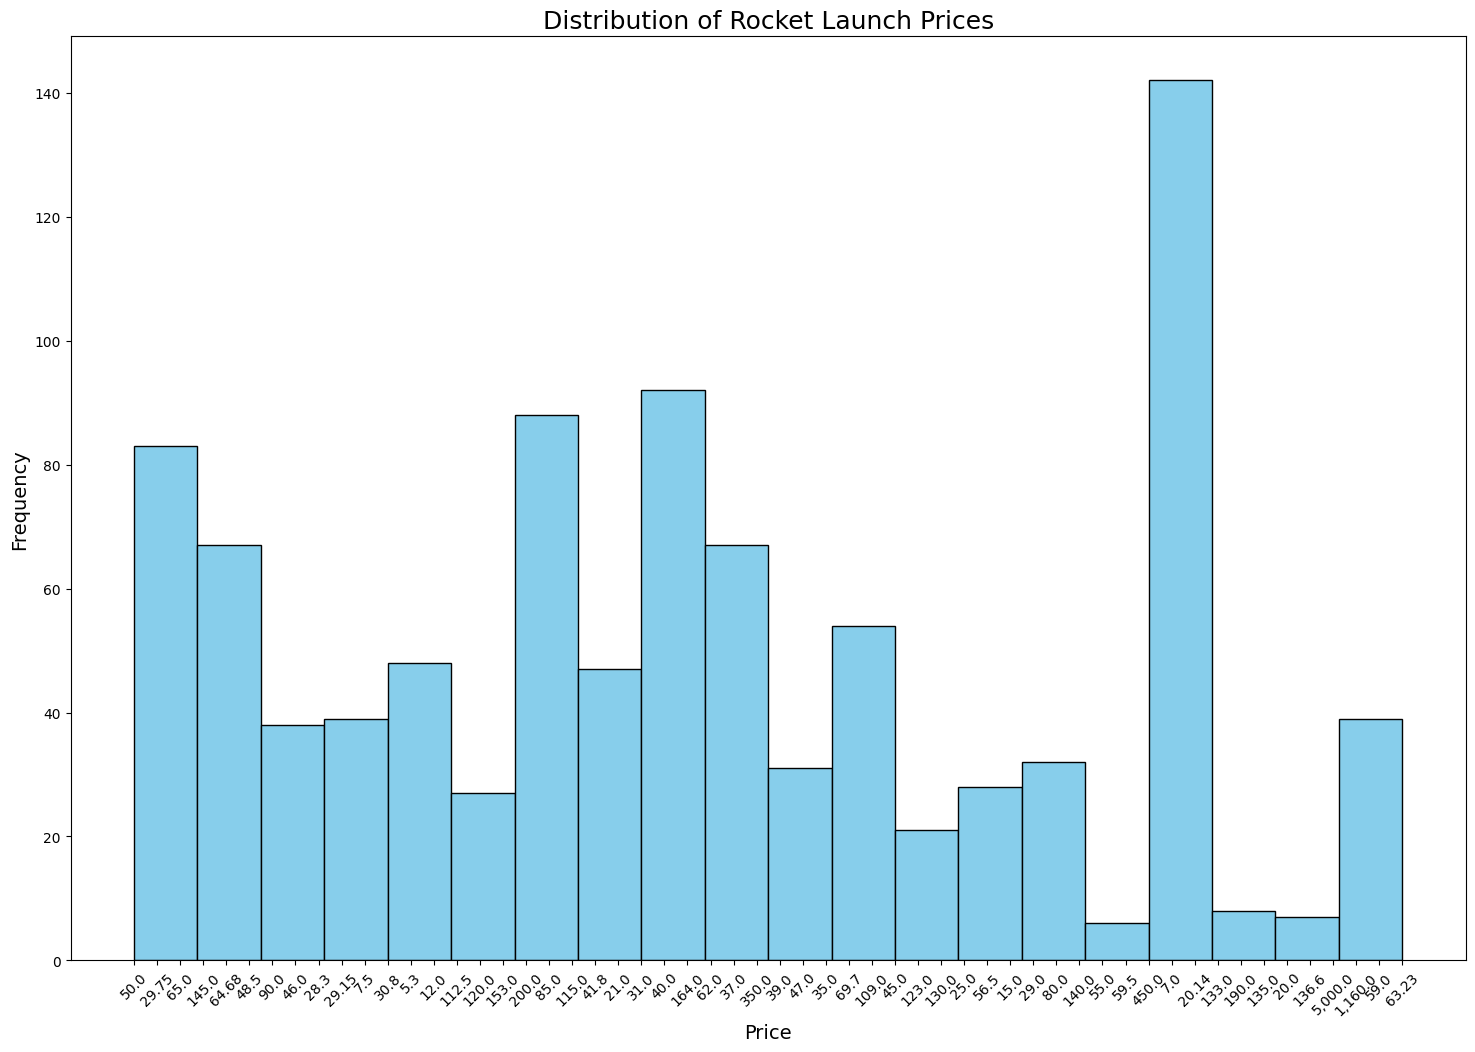

In [ ]:
plt.figure(figsize=(18, 12))
plt.hist(df_clean['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Rocket Launch Prices', fontsize=18)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data.loc[:,'Country'] = df_data['Location'].str.split(',').str[-1]
df_data.loc[:,'Country'] = df_data['Country'].str.strip()
replace_list = ["Russia", "New Mexico", "Yellow Sea", "Shahrud Missile Test Site", "Pacific Missile Range Facility", "Barents Sea", "Gran Canaria","Iran", "North Korea", "South Korea"]
replacement_list = ["Russian Federation", "USA", "China", "Iran, Islamic Republic of","USA", "Russian Federation", "USA", "Iran, Islamic Republic of", "Korea, Democratic People's Republic of", "Korea, Republic of"]

for old, new in zip(replace_list, replacement_list):
    df_data.loc[:, 'Country'] = df_data['Country'].replace(old, new)
country_list = df_data['Country'].unique()
dict ={}
for country in country_list:
    try:
        country_alpha3 = countries.get(country).alpha3
        dict[country] = country_alpha3
    except KeyError:
        print(f"Error: {country} not found in ISO 3166 database.")
    except Exception as e:
        print(f"Unexpected error for {country}: {e}")

df_country = df_data[df_data["Country"]!="Pacific Ocean"].copy()

df_country.loc[:, 'ISO Location'] = df_country['Country'].map(dict).fillna('not found')
df_launches_by_country = df_country["Country"].value_counts().reset_index()
df_launches_by_country.columns = ["Country", "Launch Count"]
df_country = df_country.merge(df_launches_by_country, on="Country", how="left")
df_country.head()


Error: Pacific Ocean not found in ISO 3166 database.


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO Location,Launch Count
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,1351
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,269
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,1351
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,701
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,1351


In [ ]:
fig = px.choropleth(df_country, locations="ISO Location",
                    color="Launch Count",
                    hover_name="Country",
                    hover_data=["Launch Count"],
                    color_continuous_scale="matter",
                    title="Number of launches by country")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
number_failures = df_country[df_country["Mission_Status"] == "Failure"]
df_failures = number_failures.groupby("Country").size().reset_index(name="Failure_Count")

df_country = df_country.merge(df_failures, on="Country", how="left")
df_country["Failure_Count"].fillna(0, inplace=True)


<ipython-input-20-290cf3847f62>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
fig = px.choropleth(df_country, locations="ISO Location",
                    color="Failure_Count",
                    hover_name="Country",
                    hover_data=["Failure_Count"],
                    color_continuous_scale="matter",
                    title="Number of Failures by country")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
launch_counts = df_country.groupby(['Country', 'Organisation', 'Mission_Status']).size().reset_index(name='Launch Count')

In [ ]:
fig = px.sunburst(df_country, path=['Country', 'Organisation', 'Mission_Status'], values='Launch Count', color='Country', color_continuous_scale='RdBu', title='Launch count by countries, organisations, mission status')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_clean.loc[:, "Price"] =pd.to_numeric(df_clean["Price"].astype('str').str.replace(",", ""))
df_price = df_clean.groupby("Organisation", as_index=False).agg({'Price': pd.Series.sum})
df_price = df_price.sort_values(by="Price", ascending=False)

In [ ]:
plt.figure(figsize=(10,14))
fig = px.bar(df_price, x='Price', y="Organisation", color='Organisation', orientation='h',
             hover_data=["Price", "Organisation"],
             title='Total Amount of Money Spent by Organisation on Space Missions')
fig.update_layout(showlegend=False)

fig.show()

<Figure size 1000x1400 with 0 Axes>

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_clean.loc[:, "Price"] =pd.to_numeric(df_clean["Price"].astype('str').str.replace(",", ""))
df_price = df_clean.groupby("Organisation", as_index=False).agg({'Price': pd.Series.mean})
df_price = df_price.sort_values(by="Price", ascending=False)
df_price.head()

,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00


In [ ]:
plt.figure(figsize=(10,14))
fig = px.bar(df_price, x='Price', y="Organisation", color='Organisation', orientation='h',
             hover_data=["Price", "Organisation"],
             title='Total Amount of Money Spent by Organisation on Space Missions')
fig.update_layout(showlegend=False)

fig.show()

<Figure size 1000x1400 with 0 Axes>

# Chart the Number of Launches per Year

In [ ]:
df_clean = df_data.dropna(subset=['Price'])
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [ ]:
df_clean['Date'] = df_clean['Date'].astype(str).str.replace(' UTC', '').str.strip()

# Try converting again
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%a %b %d, %Y %H:%M', errors='coerce')
print(df_clean['Date'].dtype)

datetime64[ns]


<ipython-input-26-a7d68f0fed14>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-a7d68f0fed14>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clean.loc[:, "Year"] = df_clean['Date'].dt.year
df_year = df_clean.groupby("Year").size()
df_year.head()

<ipython-input-27-6b5e45ef8b87>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0
Year,
"1,964.00",2
"1,965.00",2
"1,966.00",3
"1,967.00",7
"1,968.00",10


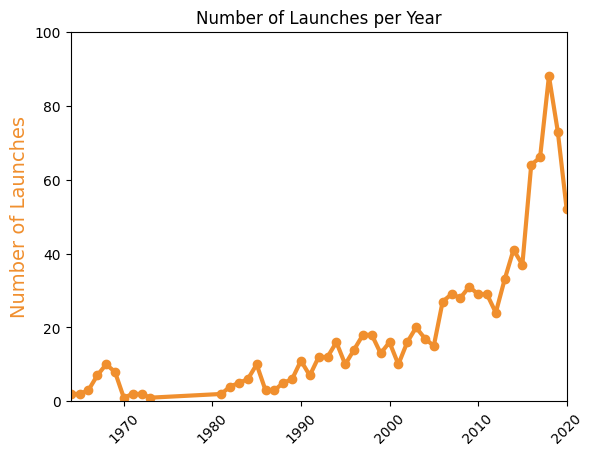

In [ ]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.title("Number of Launches per Year")

ax1 = plt.gca()
ax1.set_ylabel('Number of Launches', color='#F08F2E', fontsize=14)


ax1.set_ylim(bottom=0, top=100)
ax1.set_xlim([df_year.index.min(), df_year.index.max()])

ax1.plot(df_year.index, df_year.values, color='#F08F2E', linewidth=3, marker='o')

In [ ]:
df_year = df_clean.groupby('Year').size().reset_index(name='Launches')
fig = px.bar(df_year, x='Year', y='Launches', color='Year',
             title="Number of Launches per Year",
             labels={'Launches': 'Number of Launches', 'Year': 'Year'},
             color_continuous_scale='YlOrRd')
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_clean.loc[:, 'Month'] = df_clean['Date'].dt.month
df_month = df_clean.groupby("Month").size().reset_index(name="Launch")
print(f"The month that had the maximum launch was {df_month.loc[df_month['Launch'].idxmax()]}")

The month that had the maximum launch was Month    12.00
Launch   91.00
Name: 11, dtype: float64


<ipython-input-30-80e8830b1cec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_month['Rolling_Avg'] = df_month['Launch'].rolling(window=3).mean()

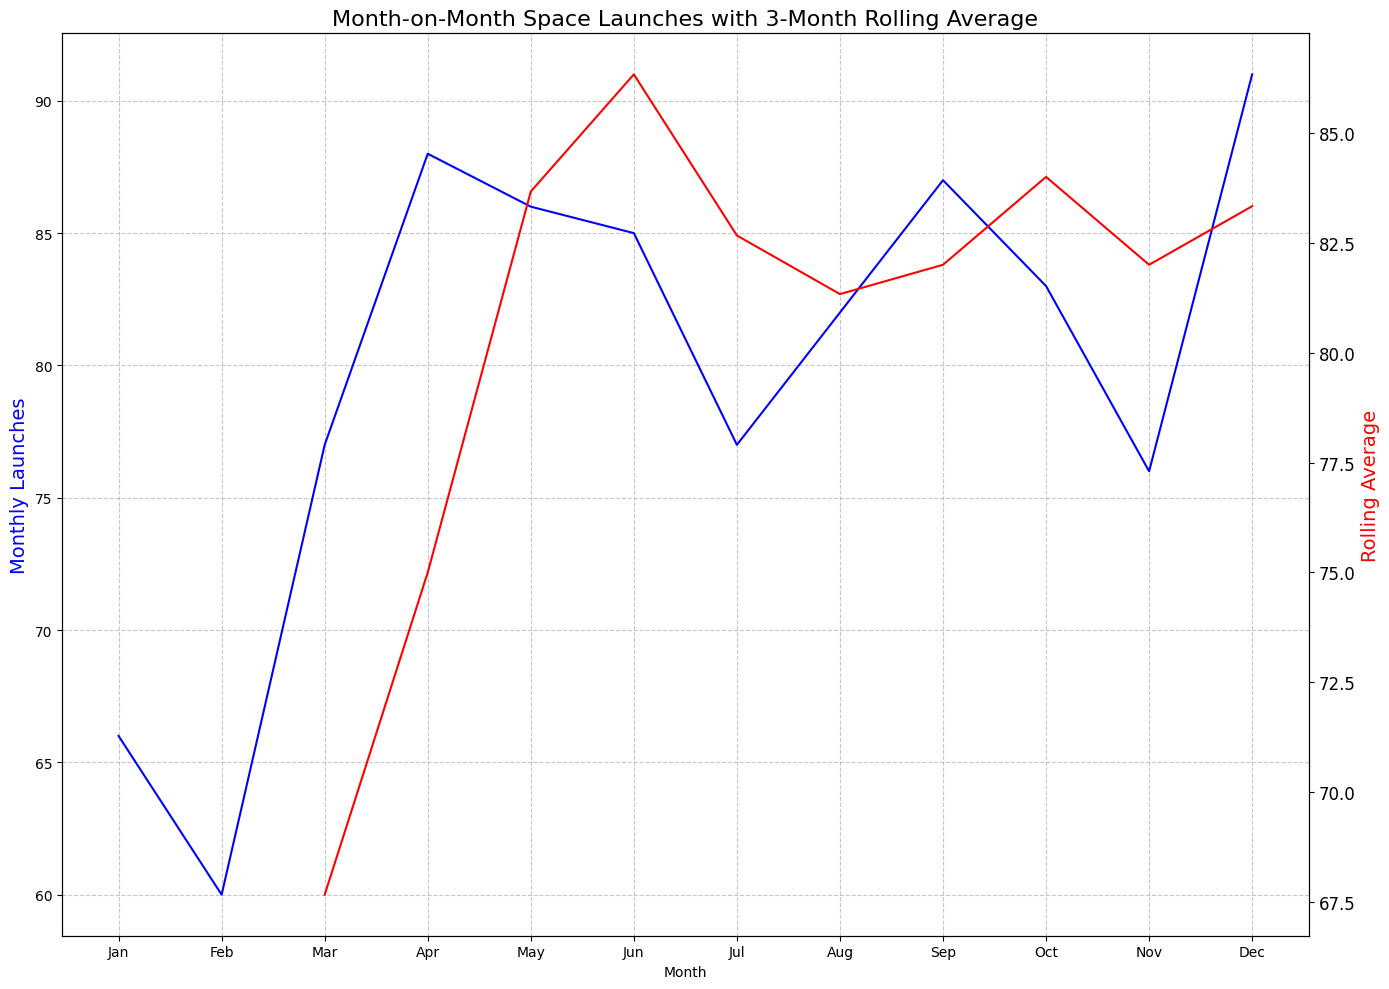

In [ ]:
plt.figure(figsize=(14, 10))

ax1 = plt.gca()

ax2 = ax1.twinx()

ax1.plot(df_month["Month"], df_month["Launch"], color="blue", label="Monthly Launches")
ax1.set_xlabel("Month")
ax1.set_ylabel("Monthly Launches", color="blue", fontsize=14)

ax2.plot(df_month["Month"], df_month["Rolling_Avg"], color="red", label="3-Month Rolling Average")
ax2.set_ylabel("Rolling Average", color="red", fontsize=14)

plt.title("Month-on-Month Space Launches with 3-Month Rolling Average", fontsize=16)
plt.xticks(df_month["Month"], labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=12)
plt.yticks(fontsize=12)

ax1.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

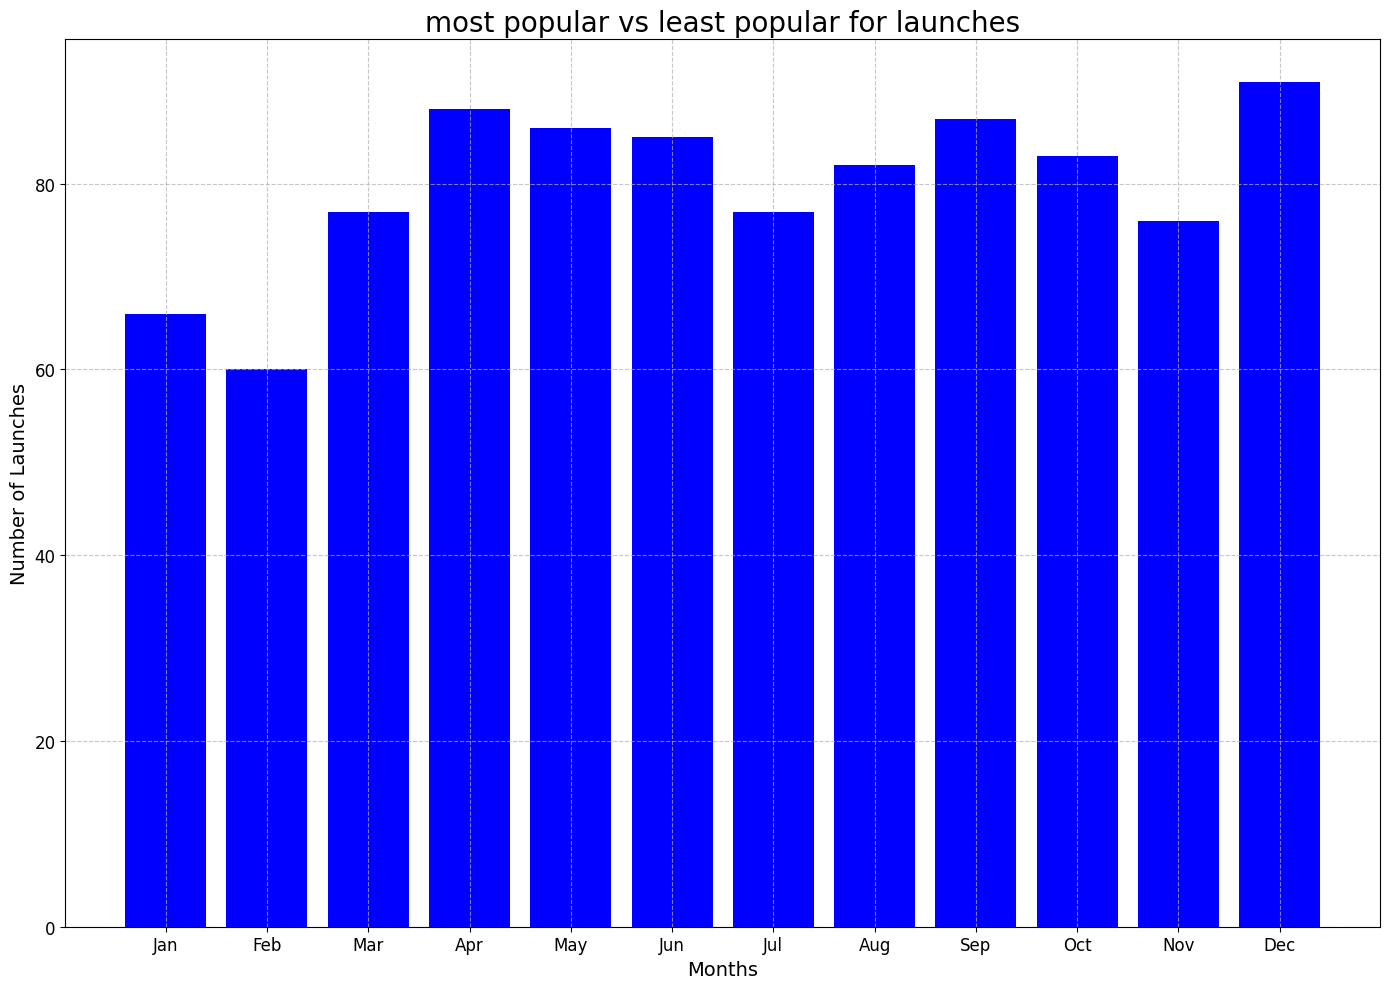

In [ ]:
plt.figure(figsize=(14,10))

plt.bar(df_month["Month"], df_month["Launch"], color="blue", label="Monthly Launches")

plt.title("most popular vs least popular for launches", fontsize=20)
plt.xticks(df_month["Month"], labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Months", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
 9   Country         4324 non-null   object
dtypes: int64(2), object(8)
memory usage: 337.9+ KB


In [ ]:
df_clean.loc[:, "Price"] = pd.to_numeric(df_clean["Price"].astype('str').str.replace(",",""))
df_variation = df_clean.groupby("Year").agg({"Price": pd.Series.mean})
df_variation.head()

,Price
Year,
"1,964.00",63.23
"1,965.00",63.23
"1,966.00",59.00
"1,967.00",216.29
"1,968.00",279.20


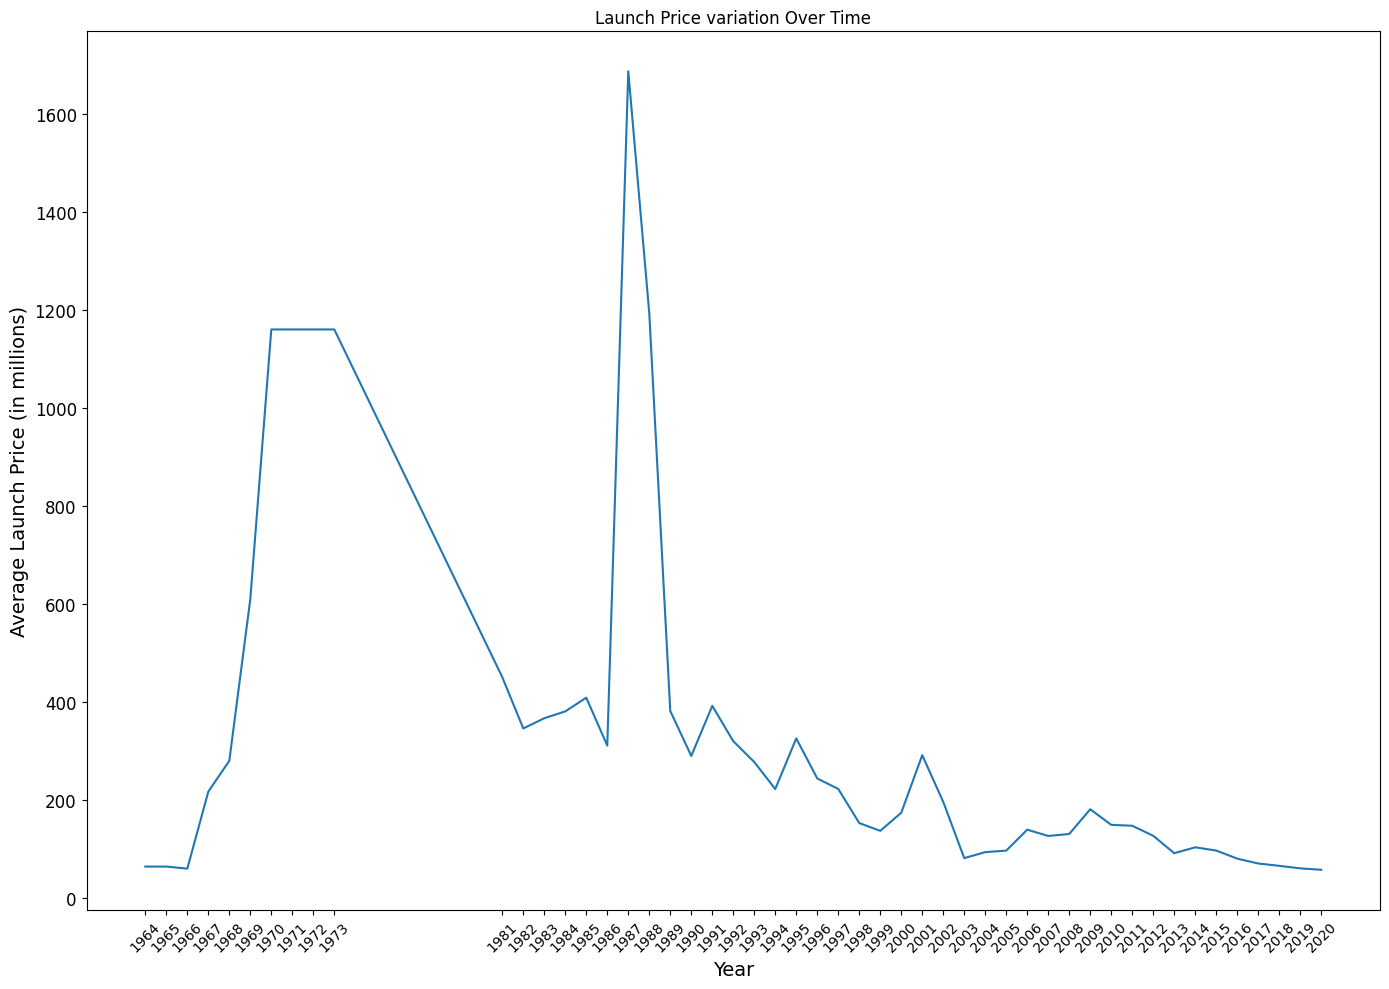

In [ ]:
plt.figure(figsize=(14,10))

plt.title("Launch Price variation Over Time")
plt.xticks(df_variation.index, fontsize=10, rotation=45)
plt.yticks(fontsize=12)

plt.plot(df_variation.index, df_variation["Price"])

plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Launch Price (in millions)", fontsize=14)

plt.tight_layout()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
df_org = df_clean.groupby("Organisation").size().reset_index(name="Count")
top_10 = df_org.sort_values("Count", ascending=False)[:10]
top_10 = top_10["Organisation"].to_list()
df_top = df_clean.loc[df_clean['Organisation'].isin(top_10)]
df_top1 = df_top.groupby(["Organisation", "Year"]).size().reset_index(name="Launch Count")
reshaped_df = df_top1.pivot(index="Year", columns="Organisation", values="Launch Count")
reshaped_df.fillna(0, inplace=True)

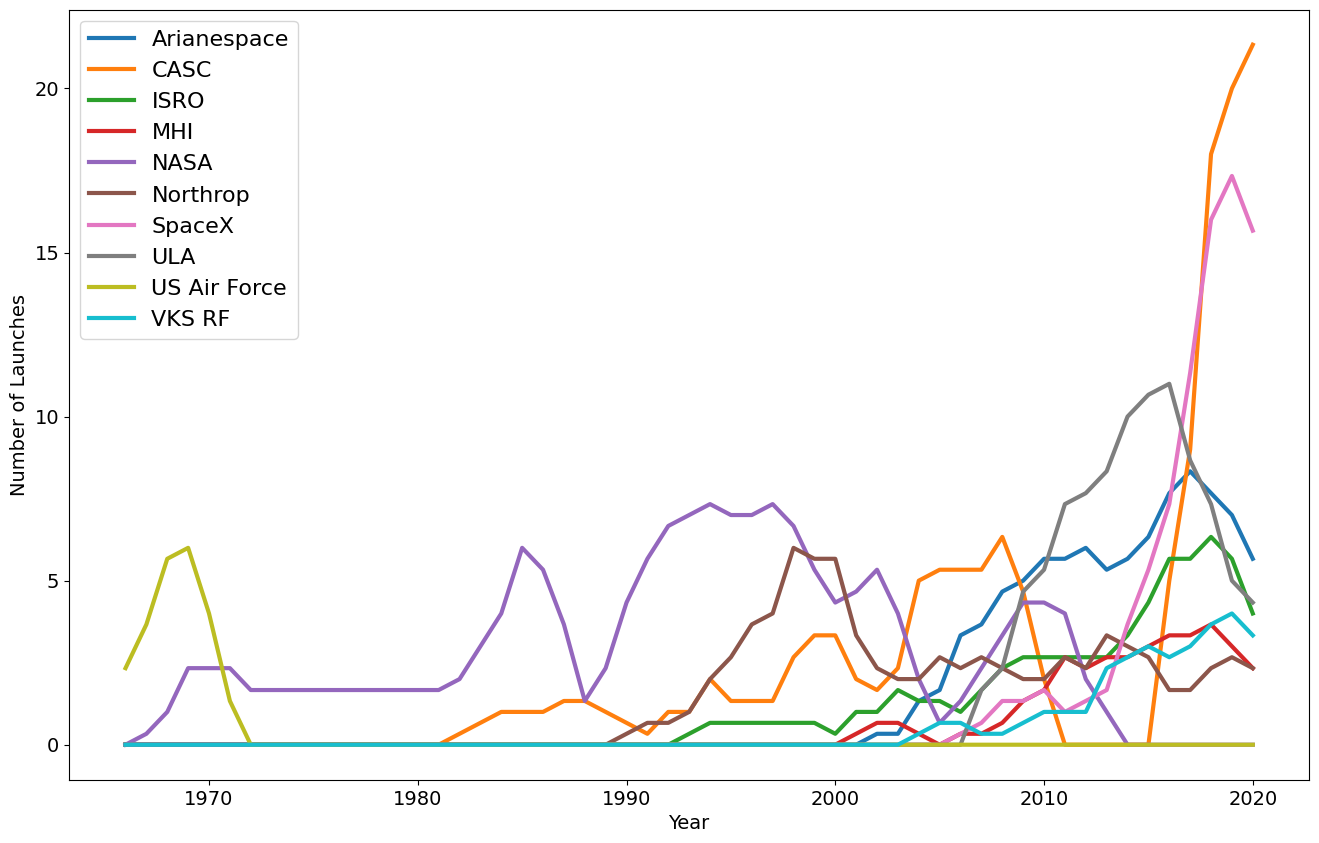

In [ ]:
roll_df = reshaped_df.rolling(window=3).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
list=["USA", "Russian Federation", "Kazakhstan"]
usa_ussr = df_clean.loc[df_clean["Country"].isin(list)]
usa_ussr.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,"2,020.00",8.00
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,"2,020.00",7.00
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,"2,020.00",7.00
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,Kazakhstan,"2,020.00",7.00
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,"2,020.00",7.00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
df_pie = usa_ussr.groupby("Country").size().reset_index(name= "Count")
fig = px.pie(labels=df_pie["Country"], values=df_pie["Count"], title="Total number of launches of the USSR and the USA", names=df_pie["Country"], hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
year_year = usa_ussr.groupby(["Year", "Country"]).size().reset_index(name="Launch Count")
df_pivot = year_year.pivot(index="Year", columns="Country", values="Launch Count")
df_pivot.fillna(0, inplace=True)
df_pivot

Country,Kazakhstan,Russian Federation,USA
Year,,,
"1,964.00",0.00,0.00,2.00
"1,965.00",0.00,0.00,2.00
"1,966.00",0.00,0.00,3.00
"1,967.00",0.00,0.00,7.00
"1,968.00",0.00,0.00,10.00
"1,969.00",0.00,0.00,8.00
"1,970.00",0.00,0.00,1.00
"1,971.00",0.00,0.00,2.00
"1,972.00",0.00,0.00,2.00


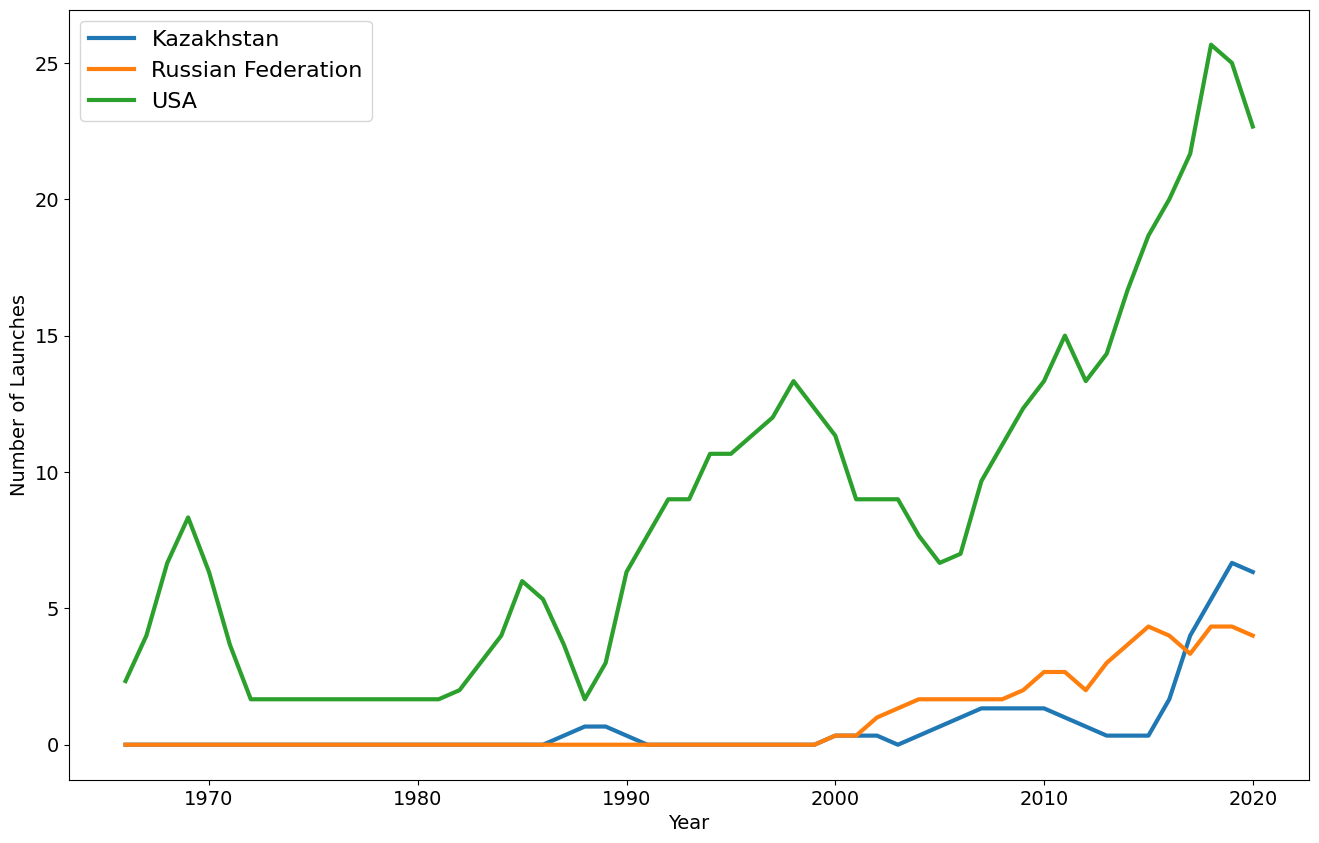

In [ ]:
roll_df = df_pivot.rolling(window=3).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

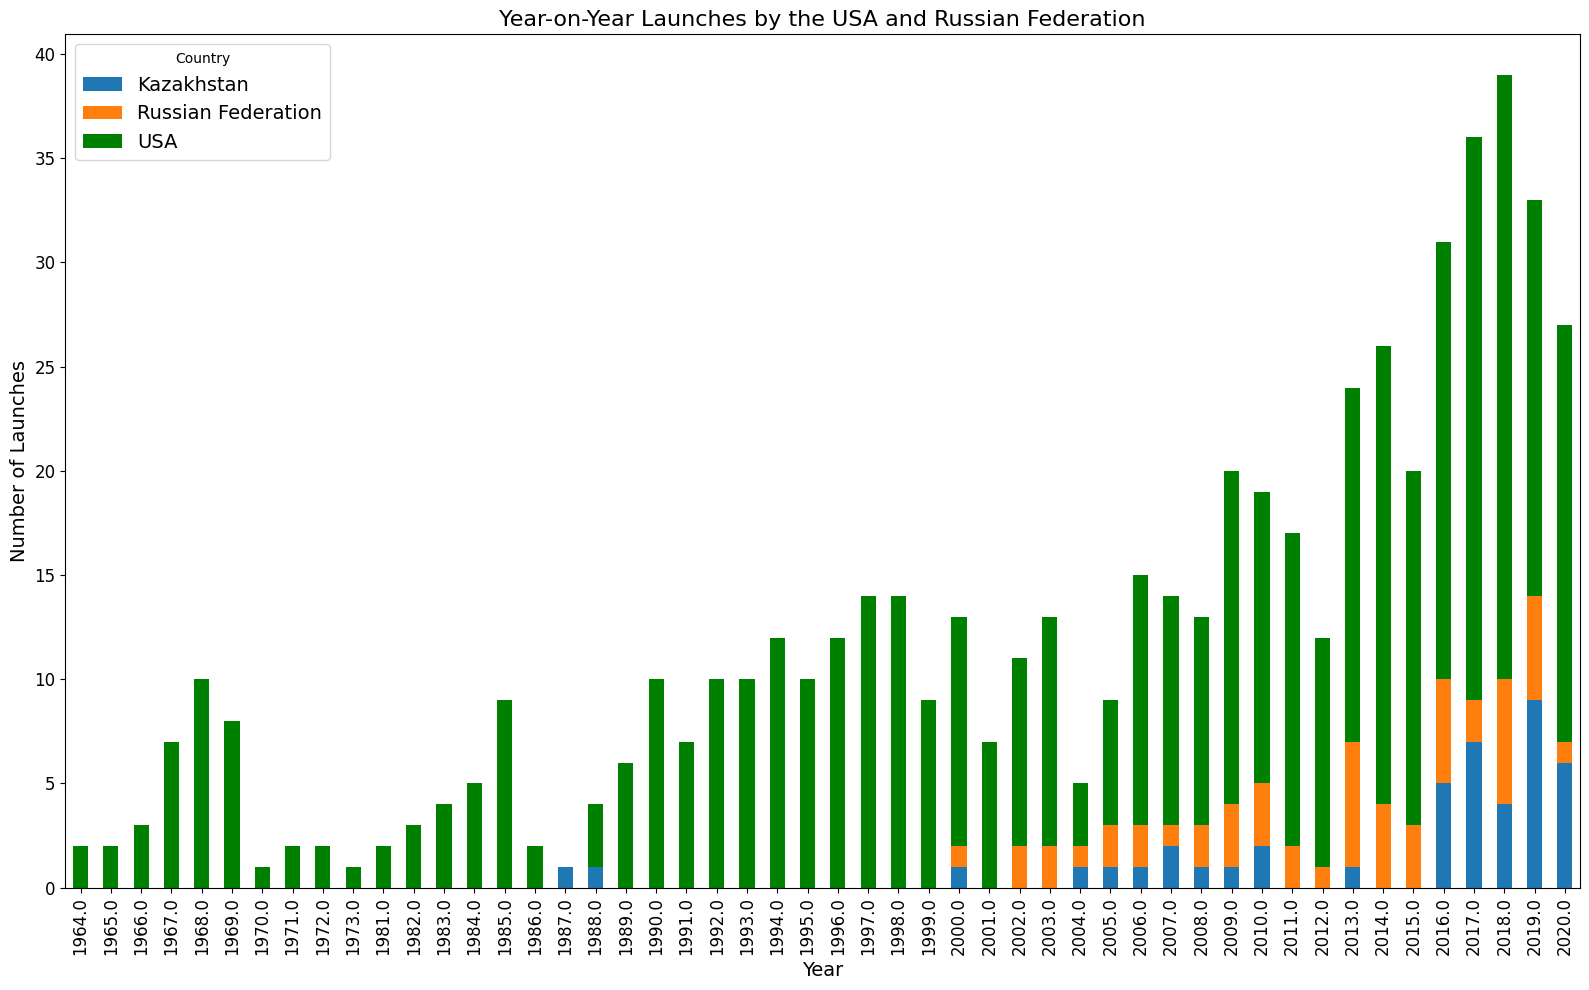

In [ ]:
df_pivot.plot(kind='bar', figsize=(16, 10), stacked=True, color=['#1f77b4', '#ff7f0e',"green"])
plt.title("Year-on-Year Launches by the USA and Russian Federation", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Country', fontsize=14)
plt.tight_layout()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
df_usa_ussr = usa_ussr.loc[usa_ussr["Mission_Status"]=="Failure"]
df_new = df_usa_ussr.groupby(["Country", "Year"]).size().reset_index(name="Failure Count")
new_pivot = df_new.pivot(index="Year", columns="Country", values="Failure Count")
new_pivot.fillna(0, inplace=True)
new_pivot

Country,Kazakhstan,Russian Federation,USA
Year,,,
"1,964.00",0.00,0.00,1.00
"1,986.00",0.00,0.00,1.00
"1,990.00",0.00,0.00,1.00
"1,993.00",0.00,0.00,1.00
"1,994.00",0.00,0.00,1.00
"1,995.00",0.00,0.00,2.00
"1,996.00",0.00,0.00,1.00
"2,001.00",0.00,0.00,1.00
"2,003.00",0.00,0.00,1.00


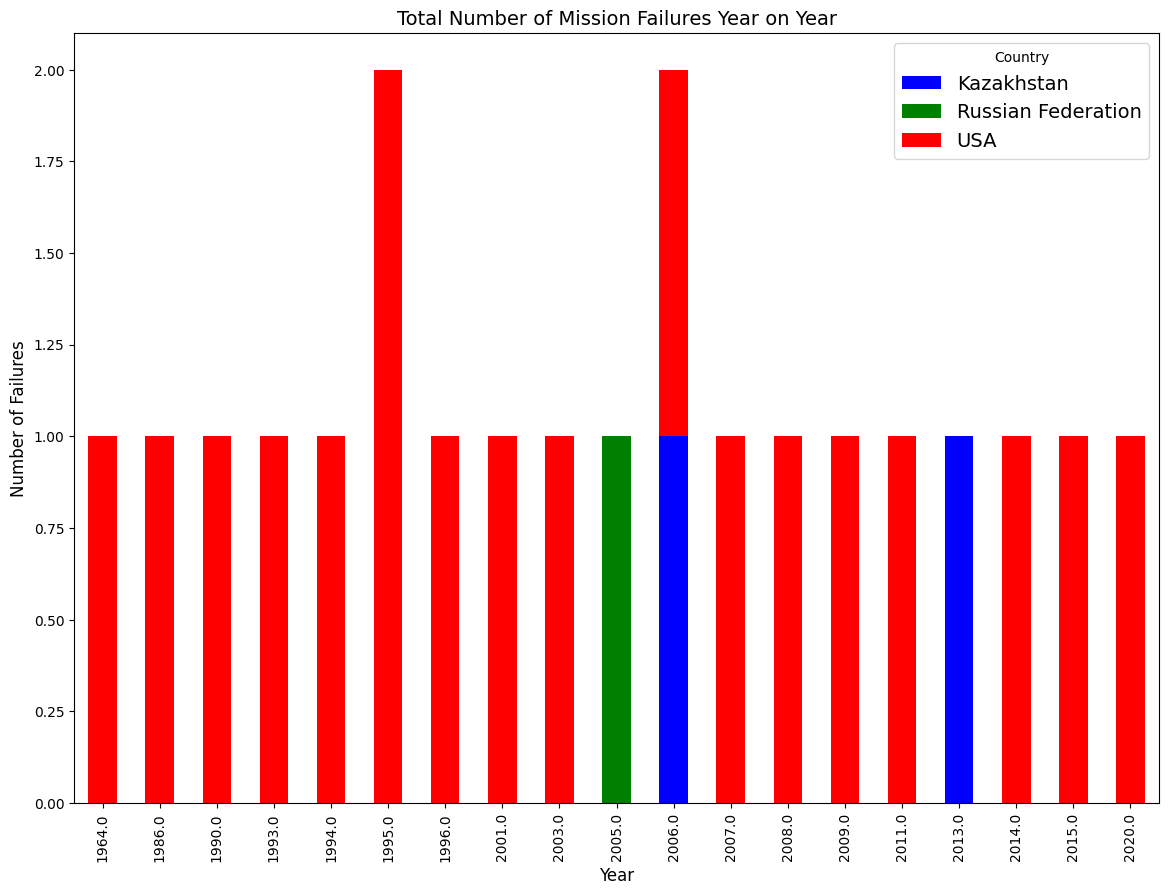

In [ ]:
new_pivot.plot(kind="bar", stacked=True, color=["blue", "green", "red"], figsize=(14,10))
plt.title("Total Number of Mission Failures Year on Year", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Failures", fontsize=12)
plt.legend(title="Country", fontsize=14)
plt.show()


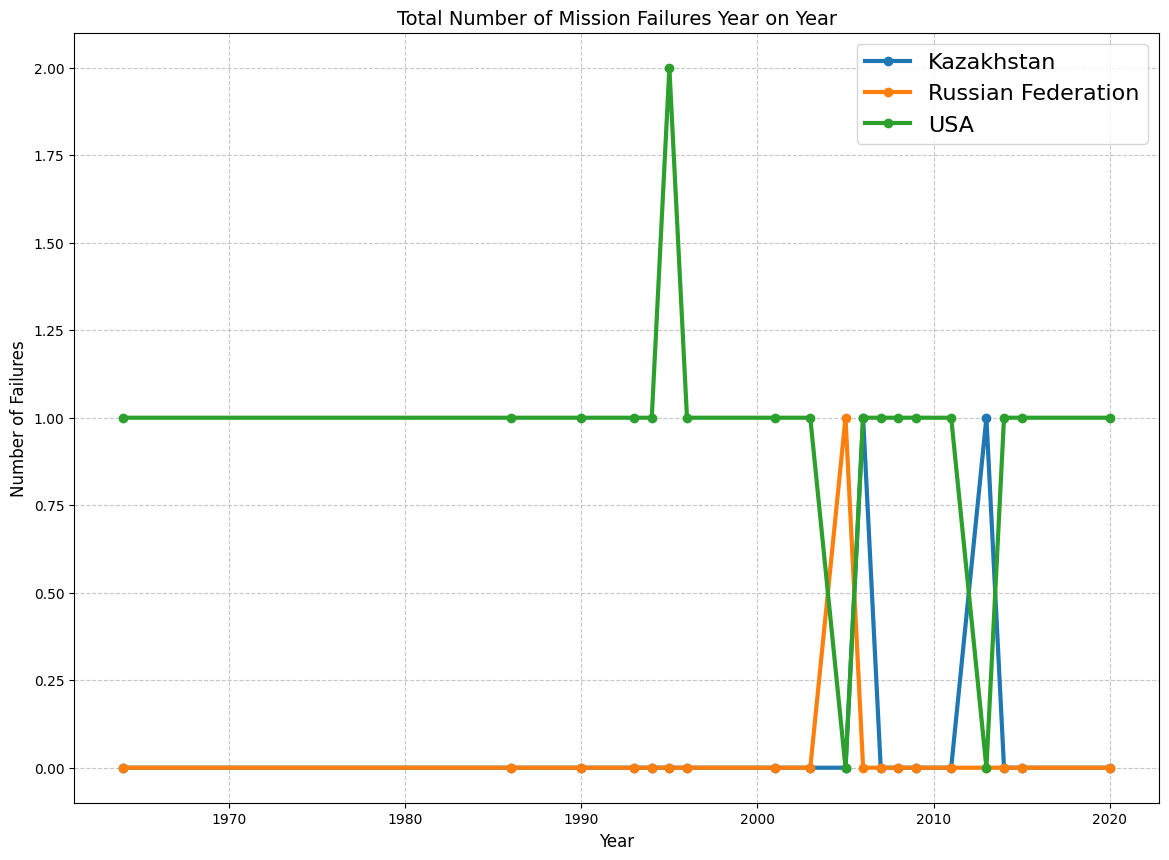

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Total Number of Mission Failures Year on Year", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Failures", fontsize=12)
for column in new_pivot.columns:
  plt.plot(new_pivot.index, new_pivot[column], label=new_pivot[column].name, linewidth=3, marker="o")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
df_usa_ussr = usa_ussr.loc[usa_ussr["Mission_Status"]=="Failure"]
df_new = df_usa_ussr.groupby(["Country","Year"]).size().reset_index(name="Failure Count")

,Country,Year,Failure Count
0,Kazakhstan,"2,006.00",1
1,Kazakhstan,"2,013.00",1
2,Russian Federation,"2,005.00",1
3,USA,"1,964.00",1
4,USA,"1,986.00",1
5,USA,"1,990.00",1
6,USA,"1,993.00",1
7,USA,"1,994.00",1
8,USA,"1,995.00",2
9,USA,"1,996.00",1


In [ ]:
df_launch = usa_ussr.groupby(["Country","Year"]).size().reset_index(name="Total Count")
df_merge = df_launch.merge(df_new, on=(["Country","Year"]), how="left")
df_merge.fillna(0, inplace=True)
df_merge["Percentage Failure"] = (df_merge["Failure Count"] / df_merge["Total Count"]) * 100
df_pivot = df_merge.pivot(index="Year", columns="Country", values="Percentage Failure")
df_pivot.fillna(0, inplace=True)

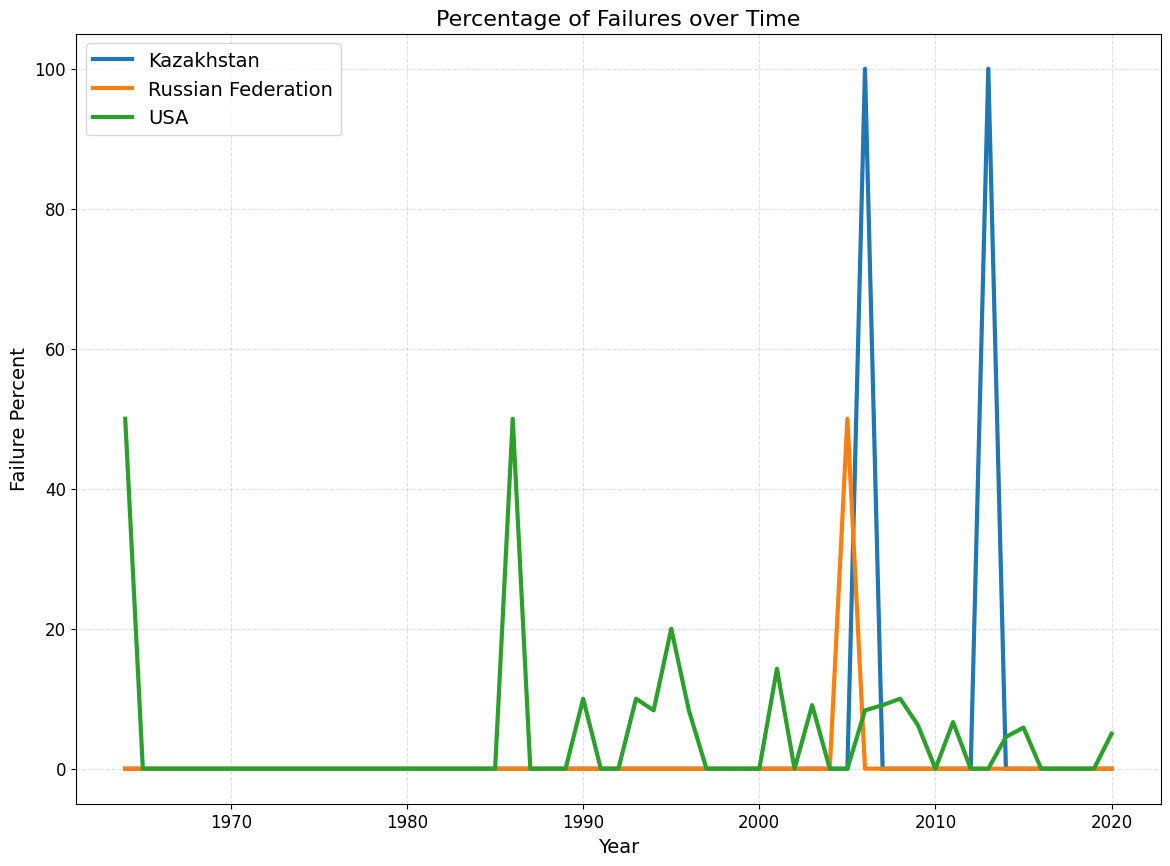

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Percentage of Failures over Time", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Failure Percent", fontsize=14)
for column in df_pivot.columns:
  plt.plot(df_pivot.index, df_pivot[column], label=df_pivot[column].name, linewidth=3)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=14)
plt.show()

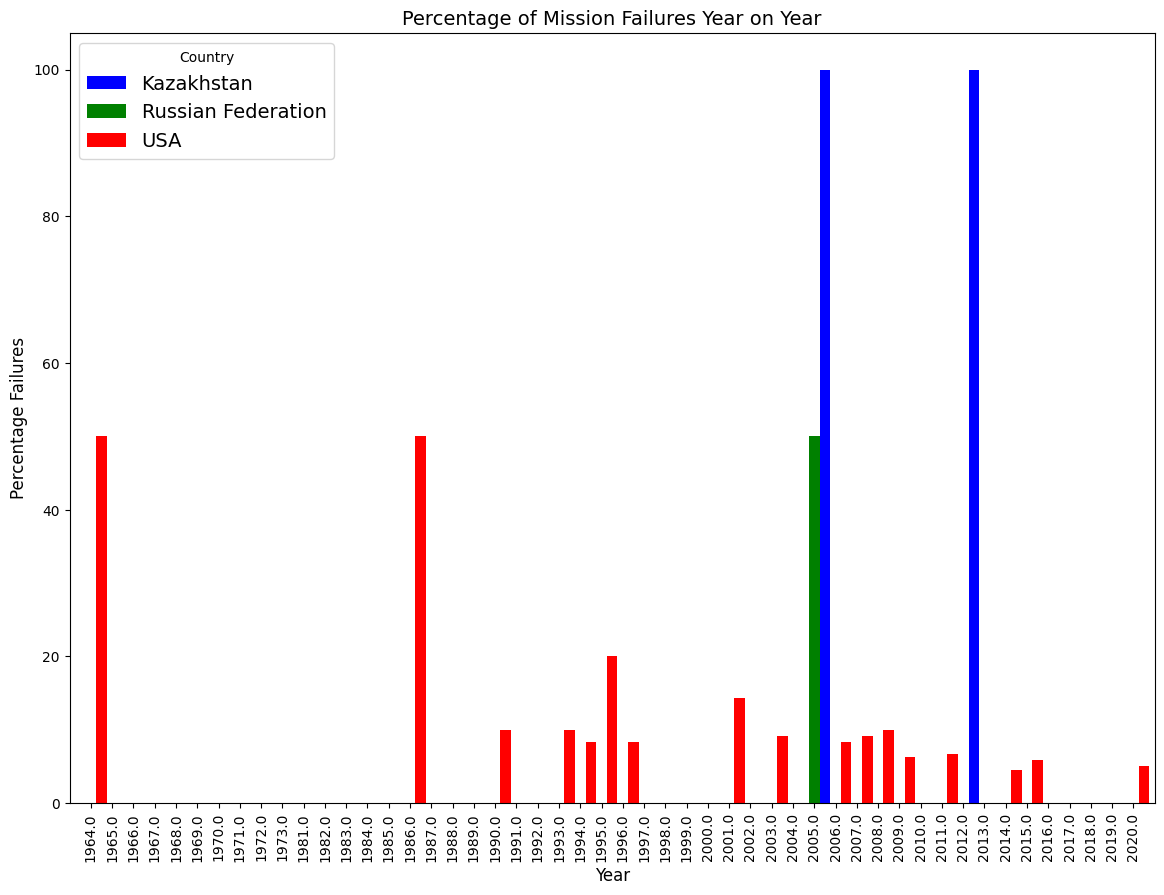

In [ ]:
df_pivot.plot(kind="bar", width=1.5, color=["blue", "green", "red"], figsize=(14,10))
plt.title("Percentage of Mission Failures Year on Year", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Failures", fontsize=12)
plt.legend(title="Country", fontsize=14)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

KeyError: 'Year'